In [21]:
#Impotuojami irankiai
import numpy as np
import random
from collections import Counter
from tabulate import tabulate
from tensorflow import keras
from keras import layers
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

In [22]:
#Ikeliami duomenys
df = np.load('flatland_train.npz')
X = df['X']
y = df['y']

y[y != 0] -= 2 #Keiciamos y vertes, kad butu paeiliui einantys skaiciai
X = X / 255. #Normalizuojamos X vertes

Keli atsitiktiniai paveiksliukai:


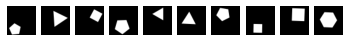

Duomenu skaicius: 10000
Ilgis: 50
Plotis: 50
Figuros skirstomos i 5 kategorijas:


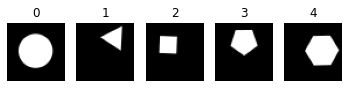

Figuru kiekis pagal kategorijas:
╒════════╤══════════╕
│   Kat. │   Kiekis │
╞════════╪══════════╡
│      0 │     1381 │
├────────┼──────────┤
│      1 │     2853 │
├────────┼──────────┤
│      2 │     1868 │
├────────┼──────────┤
│      3 │     2137 │
├────────┼──────────┤
│      4 │     1761 │
╘════════╧══════════╛


In [23]:
#Susipazinimas su duomenimis
index=random.randint(0,len(X))
print('Keli atsitiktiniai paveiksliukai:')
for i in range(10):
        plt.subplot(1,10, i+1)
        plt.imshow(X[index+1+i], cmap='gray')
        plt.axis('off')
plt.show()

print('Duomenu skaicius:',X.shape[0])
print('Ilgis:',X.shape[1])
print('Plotis:',X.shape[2])

print('Figuros skirstomos i 5 kategorijas:')
for i in range(5):
    idx= np.where(y == i)[0][0]
    plt.subplot(1,5,i+1)
    plt.imshow(X[idx], cmap='gray')
    plt.title(i)
    plt.axis('off')
plt.show()

print('Figuru kiekis pagal kategorijas:')
print(tabulate(sorted(Counter(y).items()), headers=('Kat.','Kiekis'),tablefmt='fancy_grid'))

Paveiksleliai, kurie pagal dataset yra sesiakampiai:


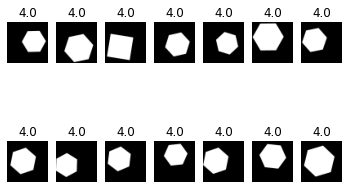

Matome, kad keturkampiui uzdeta sesiakampio "etikete":


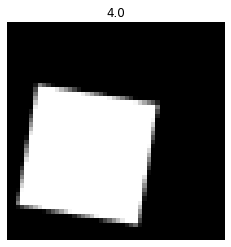

In [24]:
#Siek liek pazaidus matau, kad yra klaidingu y verciu.
#Butu gerai pasalinti klaidingus duomenis.
print('Paveiksleliai, kurie pagal dataset yra sesiakampiai:')
hex=[]
for i in range(100):
  if y[i] == 4:
    hex.append(i)

for i in range(len(hex)):
        plt.subplot(2,7, i+1)
        plt.imshow(X[hex[i]], cmap='gray')
        plt.title(y[hex[i]])
        plt.axis('off')
plt.show()

print('Matome, kad keturkampiui uzdeta sesiakampio "etikete":')

plt.subplot(1,1,1)
plt.imshow(X[19], cmap='gray')
plt.title(y[19])
plt.axis('off')
plt.show()

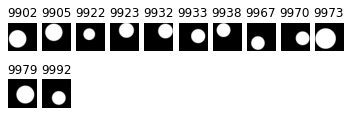

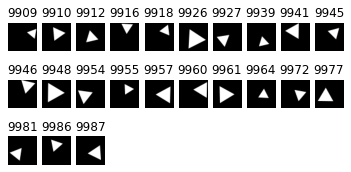

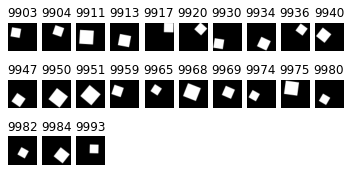

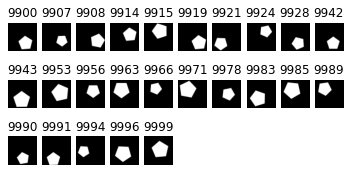

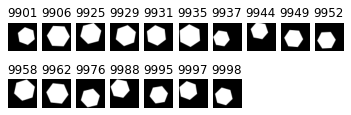

In [25]:
#Keiciant i range perziurejau visus duomenis ir ieskojau klaidingu
for j in range(5):
  set_0=[]
  for i in range(9900,10000):
    if y[i] == j:
      set_0.append(i)

  for i in range(len(set_0)):
        plt.subplot(4,10, i+1)
        plt.imshow(X[set_0[i]], cmap='gray')
        plt.title(set_0[i])
        plt.axis('off')
  plt.show()

Keli klaidingu duomenu pavyzdziai:


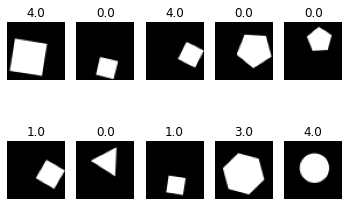

In [26]:
#Klaidingu indeksus suzymejau

wrong_data=[19,399,436,473,505,563,597,619,679,696,756,760,1238,1403,1409,
            1413,1442,1467,1474,1598,1748,1854,1975,2105,2148,2183,2225,
            2226,2281,2345,2601,2676,2721,2752,2813,2978,2980,3029,3092,
            3143,3110,3249,3276,3357,3431,3441,3798,3802,3809,3853,3896,
            3894,3988,4006,4025,4037,4063,4068,4094,4115,4168,4243,4273,
            4294,4402,4452,4484,4488,4645,4659,4759,4804,4816,4907,4980,
            5034,5056,5061,5045,5083,5130,5375,5333,5423,5571,5515,5859,
            5846,5887,5996,5965,5909,6006,6045,6068,6162,6131,6155,6222,
            6376,6384,6317,6452,6559,6517,6674,6653,6670,6679,6776,6942,
            7093,7008,7129,7107,7220,7338,7490,7557,7575,7655,7601,7806,
            7908,7956,7983,8068,8189,8360,8585,8631,8635,8613,8724,8919,
            9089,9197,9344,9495,9566,9591,9664,9687,9718,9704,9839]

print('Keli klaidingu duomenu pavyzdziai:')
for i in range(10):
        plt.subplot(2,5, i+1)
        plt.imshow(X[wrong_data[i]], cmap='gray')
        plt.title(y[wrong_data[i]])
        plt.axis('off')
plt.show()


In [27]:
#Salinu klaidingus duomenis
#Dar geriau butu pakeisti y reiksmes i teisingas, bet laiko sumetimais to nedariau
X=np.delete(X,wrong_data,axis=0)
y=np.delete(y,wrong_data)

In [28]:
print('Duomenu skaicius:',X.shape[0])
print('Figuru kiekis pagal kategorijas:')
print(tabulate(sorted(Counter(y).items()), headers=('Kat.','Kiekis'),tablefmt='fancy_grid'))
print('Matau, kad kiekiai skirtingi, galbut praverstu pasirinkti subalansuota treniravimo grupe.')

Duomenu skaicius: 9854
Figuru kiekis pagal kategorijas:
╒════════╤══════════╕
│   Kat. │   Kiekis │
╞════════╪══════════╡
│      0 │     1350 │
├────────┼──────────┤
│      1 │     2828 │
├────────┼──────────┤
│      2 │     1839 │
├────────┼──────────┤
│      3 │     2108 │
├────────┼──────────┤
│      4 │     1729 │
╘════════╧══════════╛
Matau, kad kiekiai skirtingi, galbut praverstu pasirinkti subalansuota treniravimo grupe.


In [29]:
#Duomenis atskiriu i treniravimo ir testavimo grupes (80%:20%)
#Grupese islaikau y reiksmiu proporcija
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9, stratify=y)
X_train=X_train.reshape(X_train.shape[0],50,50,1)
X_test=X_test.reshape(X_test.shape[0],50,50,1)

In [30]:
#Konstruoju modeli
model = keras.models.Sequential([
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=[50, 50, 1]),
    layers.BatchNormalization(axis=-1),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    layers.BatchNormalization(axis=-1),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    layers.BatchNormalization(axis=-1),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(5, activation='softmax')
])

model.compile(loss="sparse_categorical_crossentropy",
              optimizer="Adam",
              metrics=["accuracy"])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 48, 48, 32)        320       
                                                                 
 batch_normalization_3 (Batc  (None, 48, 48, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 24, 24, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 22, 22, 32)        9248      
                                                                 
 batch_normalization_4 (Batc  (None, 22, 22, 32)       128       
 hNormalization)                                                 
                                                      

In [31]:
#Treniruoju modeli
#Teko ekspermentuoti ieskant optimaliausio epochu skaiiciaus, kad nebutu overfit
loss = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=25, batch_size=128)


Epoch 1/25
70/70 [==============================] - 2s 15ms/step - loss: 1.1563 - accuracy: 0.5043 - val_loss: 1.7015 - val_accuracy: 0.1430
Epoch 2/25
70/70 [==============================] - 1s 12ms/step - loss: 0.4834 - accuracy: 0.8109 - val_loss: 3.4256 - val_accuracy: 0.1369
Epoch 3/25
70/70 [==============================] - 1s 12ms/step - loss: 0.1338 - accuracy: 0.9613 - val_loss: 7.1494 - val_accuracy: 0.1369
Epoch 4/25
70/70 [==============================] - 1s 12ms/step - loss: 0.0586 - accuracy: 0.9840 - val_loss: 10.4748 - val_accuracy: 0.1369
Epoch 5/25
70/70 [==============================] - 1s 16ms/step - loss: 0.0458 - accuracy: 0.9871 - val_loss: 11.1073 - val_accuracy: 0.1369
Epoch 6/25
70/70 [==============================] - 1s 17ms/step - loss: 0.0210 - accuracy: 0.9958 - val_loss: 11.7195 - val_accuracy: 0.1369
Epoch 7/25
70/70 [==============================] - 1s 17ms/step - loss: 0.0071 - accuracy: 0.9997 - val_loss: 9.7636 - val_accuracy: 0.1400
Epoch 8/25

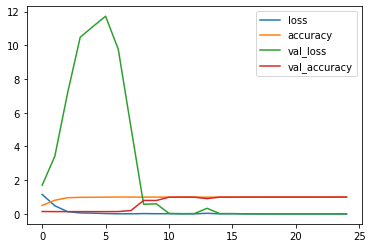

In [32]:
#Treniravimo eigos vizualizacija
pd.DataFrame(loss.history).plot()

In [33]:
#Tikrinu modelio tiksluma
pred = model.predict(X_test).argmax(axis=1)
print('Tikslumas testavimo grupeje - {0:.02%}'.format((pred == y_test).mean()))

fail = X_test[pred != y_test]
print('Klaidu skaicius:',fail.shape[0],'is',X_test.shape[0])
fail=fail.reshape(fail.shape[0],50,50)

31/31 [==============================] - 0s 2ms/step
Tikslumas testavimo grupeje - 100.00%
Klaidu skaicius: 0 is 986


In [34]:
#Tikrinu klaidas
index = np.arange(0, len(y_test))[pred != y_test]
fig, axes = plt.subplots(1, fail.shape[0], figsize=(10,10))
for i,ax in enumerate(axes.flat):
    ax.imshow(fail[i], cmap='gray')
    ax.set_axis_off()
    ax.set_title(f'Spejimas: {pred[index[i]]}, ({y_test[index[i]]})')

<Figure size 720x720 with 0 Axes>

In [35]:
model.save('final_model.h5')